In [1]:
from sklearn.cluster import KMeans
import metrics
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from time import time
import numpy as np
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import metrics

Using TensorFlow backend.
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [4]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import collections
%matplotlib inline

In [5]:

def create_dataset(X, Y, **options):
    
    look_back = options.pop('look_back', None)
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i+look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back - 1])
    return np.array(dataX), np.array(dataY)

look_back = 20

In [40]:
path = glob.glob(r'C:\Keras_Deep_Clustering\csv_trafficnet_splitted_3\*.csv')


In [41]:

X_all = np.empty((1, 20, 21))
Y_all = np.empty((1,))

for i in range(0,14):
    print(path[i])
    
    CutIn = pd.read_csv(path[i], usecols=[ 'LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu',
                                          'SpeedWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading',
                                          'CutIn','o1','o2','o3','r1','r2','r3','t1','t2','t3','tt2','tt3',
                                          'c2','c3'])
    
    
    CutIn.fillna(-1, inplace=True)

    
        
    Y_train = np.array(CutIn['CutIn'].values)
    X_train = np.array(CutIn[[ 'LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu',
                              'LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','r1',
                              'r2','r3','t1','t2','t3','tt2','tt3','c2','c3' ]])

    dimof_output = 1
    dimof_input = X_train.shape[1]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    print(X_train.shape, Y_train.shape)
    
    X, Y = create_dataset(X_train, Y_train, look_back=look_back)
    print(X.shape, Y.shape)
    
    X_all = np.append(X_all, X, axis=0)
    Y_all = np.append(Y_all, Y, axis=0)

C:\Keras_Deep_Clustering\csv_trafficnet_splitted_3\11.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted_3\12.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted_3\13.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted_3\14.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted_3\15.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted_3\16.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted_3\17.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted_3\18.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted_3\19.csv
(50000, 4) (50000,)
(49950, 50, 4) (49950,)
C:\Keras_Deep_Clustering\csv_trafficnet_splitted_3\20.csv
(50000, 4) (50000,)
(499

In [51]:
Y_all[0]=0
len(Y_all)


699301

In [52]:
np.count_nonzero(np.isnan(Y_all))

0

In [53]:
x_all = X_all.reshape((X_all.shape[0], -1))
x_all

array([[ 1.37081167e-311,  1.37081167e-311,  1.37081167e-311, ...,
         1.37126614e-311,  1.37126614e-311,  1.37126614e-311],
       [-3.42241092e-001, -1.00652633e+000,  5.68545268e-001, ...,
        -9.83169451e-001,  7.02579054e-001, -3.01201441e-002],
       [-3.42241092e-001, -1.00652633e+000,  5.75580525e-001, ...,
        -9.83169451e-001,  7.03306839e-001,  8.59067625e-002],
       ...,
       [-2.01697043e+000, -1.08340270e+000, -1.33790628e+000, ...,
        -1.08340270e+000, -7.98828761e-001,  2.31583303e+000],
       [-2.01697043e+000, -1.08340270e+000, -1.34111132e+000, ...,
        -1.08340270e+000, -7.87480715e-001,  2.13049331e+000],
       [-2.01697043e+000, -1.08340270e+000, -1.34111132e+000, ...,
        -1.08340270e+000, -7.85090161e-001,  2.13049331e+000]])

In [54]:
x_all = x_all.astype(np.uint8)
x_all.nbytes

139860200

In [55]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(x_all)

In [56]:
x_all = np.round(standardized_X , 4)

In [60]:
len(Y_all)

699301

In [61]:
sum(Y_all)

868.0

# K-means as baseline

In [62]:
from sklearn.cluster import KMeans


kmeans_under = KMeans(n_clusters=2, n_init=20 , n_jobs=4)   
y_pred_kmeans = kmeans_under.fit_predict(x_all)

In [63]:
y_pred_kmeans.shape

(699301,)

In [64]:
sum(y_pred_kmeans)

113503

In [65]:
sum(Y_all)

868.0

In [66]:
metrics.acc(Y_all, y_pred_kmeans)

C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


0.8364495403266976

In [67]:
print(y_pred_kmeans)

[0 0 0 ... 1 1 1]


In [68]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_all.round() , y_pred_kmeans )
conf_mat

array([[584930, 113503],
       [   868,      0]], dtype=int64)

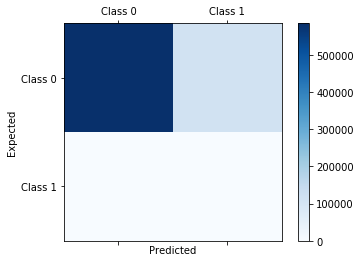

In [69]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat , cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Hyper parameters

In [70]:
def autoencoder(dims, act='relu', init='glorot_uniform'):

    n_stacks = len(dims) - 1
    input_img = Input(shape=(dims[0],), name='input')
    x = input_img
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)  

    x = encoded
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    return Model(inputs=input_img, outputs=decoded, name='AE'), Model(inputs=input_img, outputs=encoded, name='encoder')


In [72]:
dims = [x_all.shape[-1], 500, 500, 2000, 10]
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                           distribution='uniform')
pretrain_optimizer = SGD(lr=0.1, momentum=0.9)
pretrain_epochs = 100
batch_size = 256
save_dir = r'C:\Users\YALAVI\Anaconda3\Lib\site-packages\statsmodels\tsa\vector_ar\tests\results'

In [73]:
autoencoder, encoder = autoencoder(dims, init=init)

In [74]:
from keras.callbacks import EarlyStopping
usualCallback = EarlyStopping()

overfitCallback = EarlyStopping(monitor='loss', min_delta=0, patience = 20)

### Pre-train autoencoder

In [75]:


autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(x_all, x_all, batch_size=batch_size, epochs=pretrain_epochs , callbacks=[overfitCallback] ) #, callbacks=cb)
autoencoder.save_weights(save_dir + '/ae_weights.h5')



Epoch 1/100
699301/699301 [==============================] - 323s 462us/step - loss: 0.0706
Epoch 2/100
699301/699301 [==============================] - 317s 454us/step - loss: 0.0256
Epoch 3/100
699301/699301 [==============================] - 342s 488us/step - loss: 0.0206
Epoch 4/100
699301/699301 [==============================] - 344s 491us/step - loss: 0.0179
Epoch 5/100
699301/699301 [==============================] - 330s 471us/step - loss: 0.0161
Epoch 6/100
699301/699301 [==============================] - 332s 475us/step - loss: 0.0147
Epoch 7/100
699301/699301 [==============================] - 309s 442us/step - loss: 0.0138
Epoch 8/100
699301/699301 [==============================] - 312s 446us/step - loss: 0.0130
Epoch 9/100
699301/699301 [==============================] - 319s 456us/step - loss: 0.0124
Epoch 10/100
699301/699301 [==============================] - 347s 496us/step - loss: 0.0118
Epoch 11/100
699301/699301 [==============================] - 363s 519us/step -

KeyboardInterrupt: 

In [76]:

autoencoder.save_weights(save_dir + '/ae_weights.h5')

 #### Load the pre-trained auto encoder weights

In [77]:
autoencoder.load_weights(save_dir + '/ae_weights.h5')

## Build clustering model

### ClusteringLayer

In [78]:
class ClusteringLayer(Layer):


    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(shape=(self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):

        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) 
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


In [79]:
n_clusters = 2
clustering_layer = ClusteringLayer(n_clusters , name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)

In [81]:
model.compile(optimizer=SGD(0.01, 0.9), loss='kld')

### Step 1: initialize cluster centers using k-means

In [82]:
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(x_all))

In [83]:
y_pred_last = np.copy(y_pred)

In [84]:
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

### Step 2: deep clustering


In [85]:
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

In [86]:
loss = 0
index = 0
maxiter = 8000
update_interval = 140
index_array = np.arange(x_all.shape[0])

In [87]:
tol = 0.001 

### Start training

In [88]:
for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q = model.predict(x_all, verbose=0)
        p = target_distribution(q) 

        y_pred = q.argmax(1)
        if Y_all is not None:
            acc = np.round(metrics.acc(Y_all, y_pred), 5)
            nmi = np.round(metrics.nmi(Y_all, y_pred), 5)
            ari = np.round(metrics.ari(Y_all, y_pred), 5)
            loss = np.round(loss, 5)
            print('Iter %d: acc = %.5f, nmi = %.5f, ari = %.5f' % (ite, acc, nmi, ari), ' ; loss=', loss)

        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        if ite > 0 and delta_label < tol:
            print('delta_label ', delta_label, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
    idx = index_array[index * batch_size: min((index+1) * batch_size, x_all.shape[0])]
    loss = model.train_on_batch(x=x_all[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= x_all.shape[0] else 0

model.save_weights(save_dir + '/DEC_model_final.h5')

C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 0: acc = 0.73294, nmi = 0.00009, ari = -0.00051  ; loss= 0


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 140: acc = 0.72353, nmi = 0.00006, ari = -0.00041  ; loss= 0.00449


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 280: acc = 0.70591, nmi = 0.00008, ari = -0.00042  ; loss= 0.00889


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 420: acc = 0.60053, nmi = 0.00018, ari = -0.00031  ; loss= 0.00879


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 560: acc = 0.56907, nmi = 0.00021, ari = -0.00023  ; loss= 0.01453


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 700: acc = 0.56641, nmi = 0.00020, ari = -0.00022  ; loss= 0.0118


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 840: acc = 0.56613, nmi = 0.00020, ari = -0.00021  ; loss= 0.00962


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 980: acc = 0.56362, nmi = 0.00019, ari = -0.00020  ; loss= 0.00939


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1120: acc = 0.56387, nmi = 0.00020, ari = -0.00021  ; loss= 0.00933


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1260: acc = 0.56352, nmi = 0.00019, ari = -0.00021  ; loss= 0.01409


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1400: acc = 0.56177, nmi = 0.00020, ari = -0.00020  ; loss= 0.01519


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1540: acc = 0.56021, nmi = 0.00020, ari = -0.00020  ; loss= 0.01914


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 1680: acc = 0.56029, nmi = 0.00020, ari = -0.00020  ; loss= 0.00888
delta_label  0.0005576997601891031 < tol  0.001
Reached tolerance threshold. Stopping training.


### Load the clustering model trained weights

In [89]:
model.load_weights(save_dir + '/DEC_model_final.h5')

### Final Evaluation

In [90]:
q = model.predict(x_all, verbose=0)
p = target_distribution(q)

y_pred = q.argmax(1)
if Y_all is not None:
    acc = np.round(metrics.acc(Y_all, y_pred), 5)
    nmi = np.round(metrics.nmi(Y_all, y_pred), 5)
    ari = np.round(metrics.ari(Y_all, y_pred), 5)
    loss = np.round(loss, 5)
    print('Acc = %.5f, nmi = %.5f, ari = %.5f' % (acc, nmi, ari), ' ; loss=', loss)

C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Acc = 0.56029, nmi = 0.00020, ari = -0.00020  ; loss= 0.00888
